<a href="https://colab.research.google.com/github/dfklsna/sangwoo-Kim/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np


targetUrl = "https://raw.githubusercontent.com/dfklsna/sangwoo-Kim/main/insurance.csv"
df = pd.read_csv(targetUrl, sep=';')

In [80]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']] = df['age,sex,bmi,children,smoker,region,charges'].str.split(',', expand=True)
df.drop('age,sex,bmi,children,smoker,region,charges', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   object
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   object
 3   children  1338 non-null   object
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   object
dtypes: object(7)
memory usage: 73.3+ KB


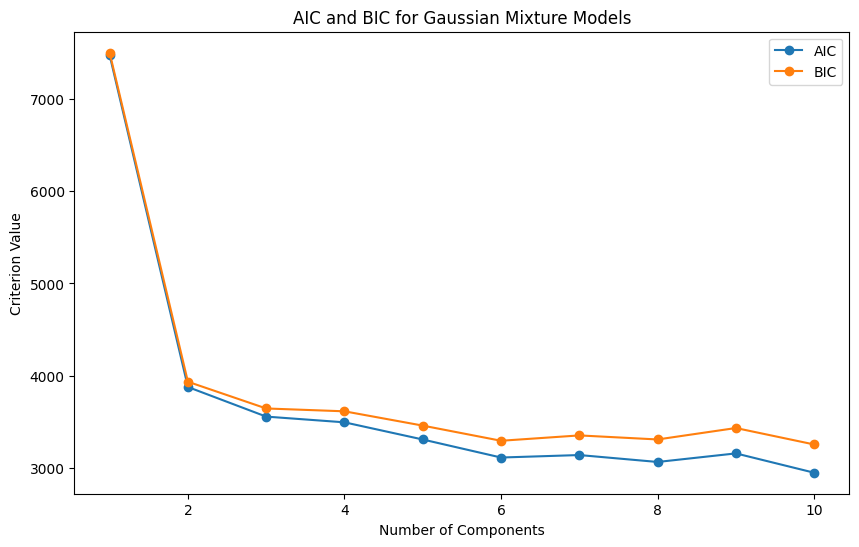

In [82]:

data = df[['age', 'charges']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_components = range(1, 11)
models = [GaussianMixture(n_components=n, covariance_type='full').fit(data_scaled) for n in n_components]


aic_values = [model.aic(data_scaled) for model in models]
bic_values = [model.bic(data_scaled) for model in models]


plt.figure(figsize=(10, 6))
plt.plot(n_components, aic_values, marker='o', label='AIC')
plt.plot(n_components, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.legend()
plt.show()


<ipython-input-97-15a179eed6c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = pd.to_numeric(data['age'], errors='coerce')
<ipython-input-97-15a179eed6c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges'] = pd.to_numeric(data['charges'], errors='coerce')
<ipython-input-97-15a179eed6c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

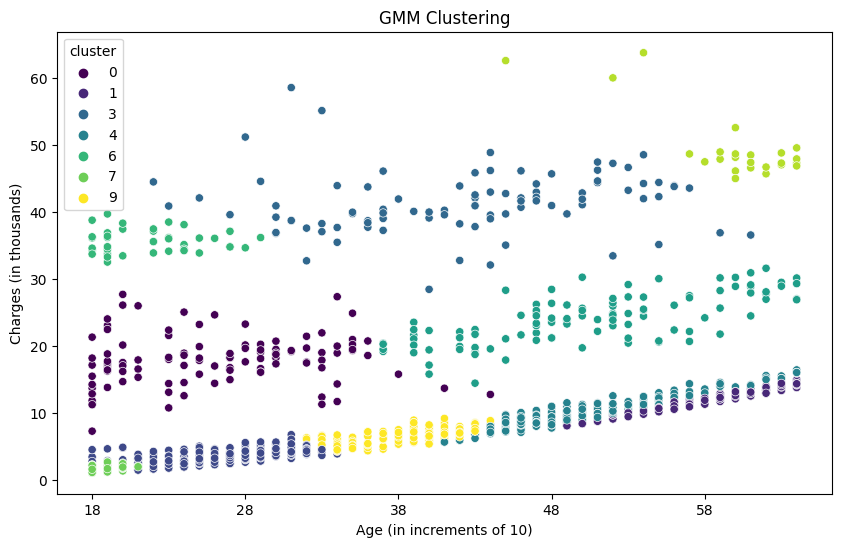

In [97]:
data = df[['age', 'charges']]

data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')


data['charges'] = data['charges'] / 1000

data = data.dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_components = np.arange(1, 11)
lowest_aic = np.inf
best_gmm = None

for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full')
    gmm.fit(data_scaled)
    aic = gmm.aic(data_scaled)

    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm = gmm

gmm = best_gmm

labels = gmm.predict(data_scaled)

data['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='cluster', palette='viridis')
plt.xticks(np.arange(min(data['age']), max(data['age'])+1, 10))
plt.xlabel('Age (in increments of 10)')
plt.ylabel('Charges (in thousands)')
plt.title('GMM Clustering')
plt.show()

In [98]:
sample_data = data.sample(n=5, random_state=42)

print(sample_data)

      age    charges  cluster
764    45   9.095068        4
887    36   5.272176        9
890    64  29.330983        5
1293   46   9.301894        4
259    19  33.750292        6


In [100]:
data = df[['age', 'charges']]

data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

data = data.dropna()

Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]

print(outliers)

     age      charges
14    27  39611.75770
19    30  36837.46700
23    34  37701.87680
29    31  38711.00000
30    22  35585.57600
...   ..          ...
1300  45  62592.87309
1301  62  46718.16325
1303  43  37829.72420
1313  19  36397.57600
1323  42  43896.37630

[139 rows x 2 columns]


<ipython-input-100-e7f7f4f29dd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges'] = pd.to_numeric(data['charges'], errors='coerce')
